In [208]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection
import math

Filename = 'TheFile.csv'
Rawdata = pd.read_csv(Filename)


nCycle = Rawdata['half.cycle'].max()
PeakVoltage = 0
TheOneCycle = 0#; %Should be 0; -1 for testing.
Mass = 0
dqdvIndicator = 2

colors = [ cm.cool(x) for x in np.linspace(0, 1, nCycle) ]


In [2]:
# import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# import math

print("Welcome. Please make sure the experiment data is stored in Data/ folder. Create the folder if it doesn't exist.\n")
while 1:
    Filename = input('Please input the file name:')
    if Filename[-4:] != ".mpr":
        Filename = Filename + ".mpr"
    try:
        subprocess.call("Rscript mprRead.R " +Filename, shell=True)
        Filename = Filename[:-4] + ".csv"
        Rawdata = pd.read_csv("Data/"+Filename)
        break
    except FileNotFoundError:
        print(Filename+" not found. The CSV Converter might be failed.")
        break
    except:
        print(Filename+" read failed. Did you put it in Data/Filename?")
        break
nCycle = Rawdata['half.cycle'].max()

Welcome. Please make sure the experiment data is stored in Data/ folder. Create the folder if it doesn't exist.

EDA0050_SYM_3_20240816_Na_NP25_GFC_1mA_Brushed_CD8.csv not found. The CSV Converter might be failed.


NameError: name 'Rawdata' is not defined

In [3]:
Filename

'EDA0050_SYM_3_20240816_Na_NP25_GFC_1mA_Brushed_CD8.csv'

In [183]:
def ztest(points, thresh=3):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [195]:

def colored_line(x, y, c, ax, **lc_kwargs):
    """
    Plot a line with a color specified along the line by a third value.

    It does this by creating a collection of line segments. Each line segment is
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should be the same size as x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """

    # Default the capstyle to butt so that the line segments smoothly line up
    default_kwargs = {"capstyle": "butt"}
    default_kwargs.update(lc_kwargs)

    # Compute the midpoints of the line segments. Include the first and last points
    # twice so we don't need any special syntax later to handle them.
    x = np.asarray(x)
    y = np.asarray(y)
    x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
    y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

    # Determine the start, middle, and end coordinate pair of each line segment.
    # Use the reshape to add an extra dimension so each pair of points is in its
    # own list. Then concatenate them to create:
    # [
    #   [(x1_start, y1_start), (x1_mid, y1_mid), (x1_end, y1_end)],
    #   [(x2_start, y2_start), (x2_mid, y2_mid), (x2_end, y2_end)],
    #   ...
    # ]
    coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
    coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
    coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
    segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

    lc = LineCollection(segments, **default_kwargs)
    lc.set_array(c)  # set the colors of each segment

    return ax.add_collection(lc)

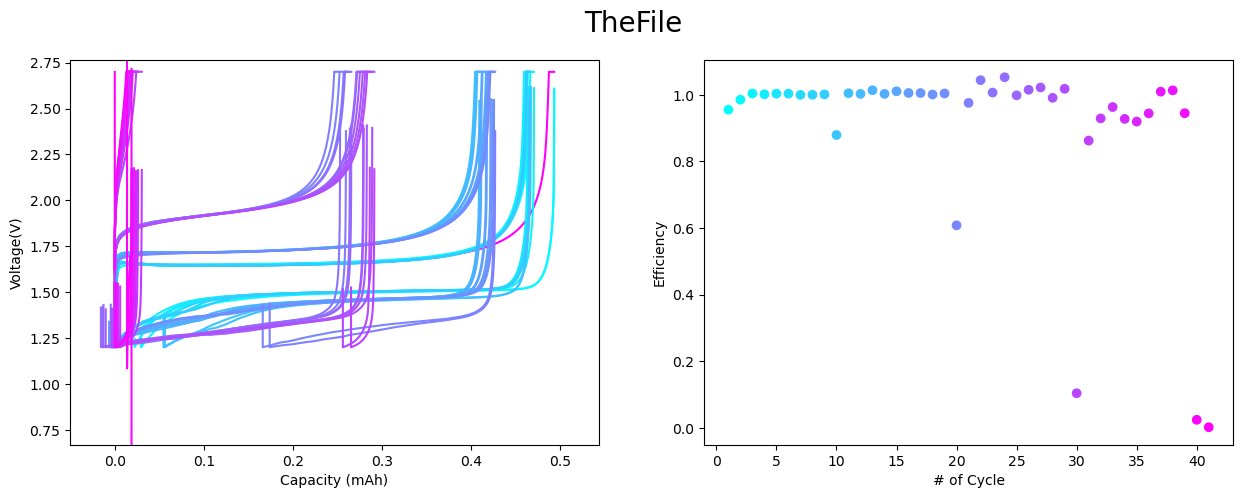

: 

In [233]:
# raw.to_csv('1.csv',index=False)
QFinal = []
QDCFinal = []
Efficiency = []
VoltageData = Rawdata['Ewe.V'].to_numpy()
Ylim = VoltageData[~ztest(VoltageData)]
plt.figure(figsize=(15,5))
plt.suptitle(Filename[:-4],fontsize=20)
plt.subplot(121)
for Index in range(TheOneCycle, nCycle+1):
# for Index in range(0, 3):
    Rawdata[Rawdata['half.cycle'] == Index]
    Xaxis = Rawdata[Rawdata['half.cycle'] == Index]['Q.charge.discharge.mA.h']
    if (Index % 2 == 0): 
        QFinal.append(Rawdata[Rawdata['half.cycle'] == Index]['Q.charge.discharge.mA.h'].iloc[-1])
    if (Index % 2 == 1): 
        QDCFinal.append(Rawdata[Rawdata['half.cycle'] == Index]['Q.charge.discharge.mA.h'].iloc[-1])
        Xaxis = QFinal[Index // 2 - 1]+Xaxis
    Yaxis = Rawdata[Rawdata['half.cycle'] == Index]['Ewe.V']
    plt.plot(Xaxis, Yaxis, color=colors[Index-1])
    plt.xlabel("Capacity (mAh)")
    plt.ylabel("Voltage(V)")
Xlim = np.array(QFinal)[~ztest(np.array(QFinal))]
plt.xlim(-0.05,np.max(Xlim)+0.05)
plt.ylim(np.min(Ylim)-0.05,np.max(Ylim)+0.05)
plt.subplot(122)
for Index in range(min(len(QFinal),len(QDCFinal))):
    Efficiency.append(-QDCFinal[Index] / QFinal[Index])
plt.scatter(range(1,len(Efficiency)+1), Efficiency , c=range(len(Efficiency)),cmap="cool")
plt.xlabel("# of Cycle")
plt.ylabel("Efficiency")
plt.show()

In [207]:
from importlib import reload   # not needed for python 2
reload(plt)

TypeError: reload() argument must be a module

In [219]:
# [np.linspace(0, 1, len(Efficiency))]
range(1,10)[1]

2

plot 

capacity / Voltage

mAh/mg / voltage (need mass)

Charge/discharge (final Q on each half cycle)

Q charge is positive for charge and negative for dischargem in the Q.charge.discharge.mA.h

Automatic detection